
# Group Project - Financial Programming

In [183]:
# Importing libraries
from bokeh.io import output_notebook, show, output_file
from bokeh.layouts import gridplot
from bokeh.plotting import figure
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
import pandas as pd
import numpy as np 
import numpy
import math  

In [2]:
# Stablishing the directory from we will get our inputs
directory = "C:/Users/rsharma3/OneDrive - IESEG/Financial Programming/Group Project_Customer Loan/data_berka"

In [3]:
# Import each one of the databases
client = pd.read_csv(directory + '/client.asc', sep=';')

account = pd.read_csv(directory + '/account.asc', sep=';')

card = pd.read_csv(directory + '/card.asc', sep=';')

district = pd.read_csv(directory + '/district.asc', sep=';')

disp = pd.read_csv(directory + '/disp.asc', sep=';')

order = pd.read_csv(directory + '/order.asc', sep=';')

trans = pd.read_csv(directory + '/trans.asc', sep=';', low_memory=False)

loan = pd.read_csv(directory + '/loan.asc', sep=';')

account = pd.read_csv(directory + '/account.asc', sep=';')

## 1) Checking and Cleaning Features 

***Objective:*** Clean and prepare each one of the tables.

### a) Client: 

In [4]:
# Knowing the database
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [5]:
# Knowing the features
client.dtypes

client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [6]:
# Detecting missing values
account.isna().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [7]:
# Changing the formatting of each one of our features

## Creating new features from 'birth_number'
client.loc[:, "birth_year"] = '19' + client["birth_number"].astype(str).str[:2]
client.loc[:, "birth_year"] = client.loc[:, "birth_year"].astype(int)

client.loc[:, "birth_day"] = client["birth_number"].astype(str).str[-2:]
client.loc[:, "birth_day"] = client.loc[:, "birth_day"].astype(int)

client.loc[:, 'birth_month'] = client["birth_number"].astype(str).str[2:4].astype(int)

client.loc[:, "age"] = 1999 - client["birth_year"]
client.loc[:, "age_group"] = client["age"]//10*10

## Deiphering the gender code
client.loc[:, 'gender'] = "M"
client.loc[client['birth_month']>50, 'gender'] = "F"
client.loc[client['gender'] == "F", 'birth_month'] = client.loc[client['gender'] == "F", 'birth_month']-50

In [8]:
# Eliminating birth_number
client =  client.drop(columns="birth_number")

In [9]:
# Transformed Client database
client.head()

,client_id,district_id,birth_year,birth_day,birth_month,age,age_group,gender
0,1,18,1970,13,12,29,20,F
1,2,1,1945,4,2,54,50,M
2,3,1,1940,9,10,59,50,F
3,4,5,1956,1,12,43,40,M
4,5,5,1960,3,7,39,30,F


### b) Account:

In [10]:
# Knowing the database
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [11]:
# Knowing the features
account.dtypes

account_id      int64
district_id     int64
frequency      object
date            int64
dtype: object

In [12]:
# Detecting missing values
account.isna().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [13]:
# Changing the formatting of each one of our features
account['frequency'] = account['frequency'].replace({'POPLATEK MESICNE':'Monthly issuance'})
account['frequency'] = account['frequency'].replace({'POPLATEK PO OBRATU':'Weekly issuance '})
account['frequency'] = account['frequency'].replace({'POPLATEK TYDNE':'Issuance after transaction'})


## Creating new features from 'birth_number'
account["year"] = ("19" + account.date.astype(str).str[:2]).astype(int)
account["month"] = (account.date.astype(str).str[2:4]).astype(int)
account["day"] = (account.date.astype(str).str[-2:]).astype(int)

In [14]:
# Eliminating original date feature
account =  account.drop(columns="date")

In [15]:
# Transformed Account database
account.head()

,account_id,district_id,frequency,year,month,day
0,576,55,Monthly issuance,1993,1,1
1,3818,74,Monthly issuance,1993,1,1
2,704,55,Monthly issuance,1993,1,1
3,2378,16,Monthly issuance,1993,1,1
4,2632,24,Monthly issuance,1993,1,2


### c) Card: 

In [16]:
# Knowing the database
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [17]:
# Knowing the features
card.dtypes

card_id     int64
disp_id     int64
type       object
issued     object
dtype: object

In [18]:
# Detecting missing values
card.isna().sum()

card_id    0
disp_id    0
type       0
issued     0
dtype: int64

In [19]:
# Changing the formatting of each one of our features
card["year"] = ("19" + card.issued.astype(str).str[:2]).astype(int)
card["month"] = (card.issued.astype(str).str[2:4]).astype(int)
card["day"] = (card.issued.astype(str).str[-2:]).astype(int)

In [20]:
# Eliminating original issued feature
card = card.drop(columns="issued")

In [21]:
# Transformed Card database
card.head()

,card_id,disp_id,type,year,month,day
0,1005,9285,classic,1993,11,0
1,104,588,classic,1994,1,0
2,747,4915,classic,1994,2,0
3,70,439,classic,1994,2,0
4,577,3687,classic,1994,2,0


### d) Transaction:  

In [22]:
# Knowing the database
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [23]:
# Knowing the feature
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null int64
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      574439 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [24]:
# Changing the formatting of each one of our features

## type
trans['type'] = trans['type'].replace({'PRIJEM':'Credit'})
trans['type'] = trans['type'].replace({'VYDAJ':'Withdrawal'})
trans['type'] = trans['type'].replace({'VYBER':'Withdrawal'})

# k_symbol
trans['k_symbol'] = trans['k_symbol'].replace({'POJISTNE':'Insurance payment'})
trans['k_symbol'] = trans['k_symbol'].replace({'SLUZBY':'Payment for statement'})
trans['k_symbol'] = trans['k_symbol'].replace({'UROK':'Interest credited'})
trans['k_symbol'] = trans['k_symbol'].replace({'SANKC. UROK':'Sanction interest'})
trans['k_symbol'] = trans['k_symbol'].replace({'SIPO':'Household'})
trans['k_symbol'] = trans['k_symbol'].replace({'DUCHOD':'Old age pension'})
trans['k_symbol'] = trans['k_symbol'].replace({'UVER':'Loan payment'})
trans['k_symbol'] = trans['k_symbol'].replace({' ':'Missing'})
trans['k_symbol'] = trans['k_symbol'].replace({nan:'Missing'})

## operation
trans['operation'] = trans['operation'].replace({'VYBER KARTOU':'Credit card withdrawal'})
trans['operation'] = trans['operation'].replace({'VKLAD':'Credit in cash'})
trans['operation'] = trans['operation'].replace({'PREVOD Z UCTU':'Collection other bank'})
trans['operation'] = trans['operation'].replace({'VYBER':'Withdrawal in cash'})
trans['operation'] = trans['operation'].replace({'PREVOD NA UCET':'Remittance to another bank'})
trans['operation'] = trans['operation'].replace({nan:'Missing'})

## bank
trans['bank'] = trans['bank'].replace({nan:'Other bank'})

## account
trans['account'] = trans['account'].replace({nan:'Missing'})

## date
trans["year"] = ("19" + trans.date.astype(str).str[:2]).astype(int)
trans["month"] = (trans.date.astype(str).str[2:4]).astype(int)
trans["day"] = (trans.date.astype(str).str[-2:]).astype(int)

### e) Loan: 

In [25]:
# Knowing the database
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [26]:
# Creating a dictionary in order to change the status
dictionary1 = {"A":"Loan repaid. Contract closed",
              "B":"Loan unpaid. Contract closed",
              "C":"OK so far. Contract running",
              "D":"Client in debt. Contract running" }

In [27]:
# Replacing the labels of the rows in the 'status' feature
loan = loan.replace({"status":dictionary1})

In [28]:
# Changing formatting of 'date' feature
loan["year"] = ("19" + loan.date.astype(str).str[:2]).astype(int)
loan["month"] = (loan.date.astype(str).str[2:4]).astype(int)
loan["day"] = (loan.date.astype(str).str[-2:]).astype(int)

In [29]:
# Eliminating a rendundant feature 
loan =  loan.drop(columns="date")

In [30]:
# Naming the columns
loan.columns = ['loan_id', 'account_id', 'loan_amount', 'loan_duration', 'loan_emi', 'loan_status',
       'loan_year', 'loan_month', 'loan_day']

In [31]:
# Transformed database
loan.head()

,loan_id,account_id,loan_amount,loan_duration,loan_emi,loan_status,loan_year,loan_month,loan_day
0,5314,1787,96396,12,8033.0,Loan unpaid. Contract closed,1993,7,5
1,5316,1801,165960,36,4610.0,Loan repaid. Contract closed,1993,7,11
2,6863,9188,127080,60,2118.0,Loan repaid. Contract closed,1993,7,28
3,5325,1843,105804,36,2939.0,Loan repaid. Contract closed,1993,8,3
4,7240,11013,274740,60,4579.0,Loan repaid. Contract closed,1993,9,6


### f) Order: 

In [32]:
# Knowing order database
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [33]:
# Changin the name of the k_symbol elements
order['k_symbol']=order['k_symbol'].replace({'SIPO':'Household Payment'})
order['k_symbol']=order['k_symbol'].replace({'UVER':'Loan Payment'})
order['k_symbol']=order['k_symbol'].replace({'LEASING':'Leasing'})
order['k_symbol']=order['k_symbol'].replace({'POJISTNE':'Insurance Payment'})
order['k_symbol']=order['k_symbol'].replace({' ':'Missing'})

### g) Disposition:

In [34]:
# Replacing missing values with 0's
disp2 = pd.pivot_table(disp, values = 'client_id', index = 'account_id', columns = ['type'], aggfunc = ['count']).fillna(0)

In [35]:
# Knowing database
disp2.head(1)

count      
type       DISPONENT OWNER
account_id                
1                0.0   1.0

In [36]:
# Merging 
left_table = disp2
right_table = disp

disp1 = pd.merge(left_table,
        right_table,
        how="left",
        left_on="account_id",
        right_on="account_id"
        )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [37]:
disp1.head()

,account_id,"(count, DISPONENT)","(count, OWNER)",disp_id,client_id,type
0,1,0.0,1.0,1,1,OWNER
1,2,1.0,1.0,2,2,OWNER
2,2,1.0,1.0,3,3,DISPONENT
3,3,1.0,1.0,4,4,OWNER
4,3,1.0,1.0,5,5,DISPONENT


# 2) Merging tables 

***Objective:*** Once prepared, now we can merge the tables in a way that the final output allows to have each one of the clients with their respective information. In the case of tables such as transactions, which present more than one observation per client, we are going to pivot these cases in order to get back some metrics (mean, sum, max, min). Last but not least, pivoted tables will also give us some cross analysis (for example, mean credit of Y year in M month). 

***Transaction Transformation***

In [38]:
# Cross Analysis: Aggregated metrics of Credit and Withdrawal by month
Trans_transformation_type = pd.pivot_table(trans, values = 'amount', index = 'account_id', columns = ['type','month'], aggfunc = ['count','sum'])
Trans_transformation_type = Trans_transformation_type.fillna(0)
Trans_transformation_type.head()

count                                                        ...  \
type       Credit                                                        ...   
month          1     2     3     4     5     6     7     8     9     10  ...   
account_id                                                               ...   
1             7.0   9.0   8.0   9.0   9.0   9.0  10.0   9.0   8.0   8.0  ...   
2            12.0  14.0  13.0  13.0  13.0  13.0  13.0  12.0  12.0  13.0  ...   
3             2.0   3.0   3.0   3.0   2.0   2.0   6.0   6.0   5.0   5.0  ...   
4             4.0   5.0   5.0   5.0   5.0   5.0   6.0   6.0   6.0   6.0  ...   
5             2.0   2.0   2.0   2.0   3.0   3.0   3.0   3.0   3.0   4.0  ...   

                  sum                                                    \
type       Withdrawal                                                     
month              3         4         5         6         7         8    
account_id                                                                
1             12809.8   10629.8   11129.8    8409.8   13689.8   19804.4   
2             96691.4  116419.4  140761.4  150020.4  130352.0  151459.0   
3              5015.6    8135.6    5815.6    9415.6    5015.6    5215.6   
4              8515.2    7555.2    9075.2   13285.2   11794.8   17232.8   
5              3482.6    4882.6    5082.6    3482.6    6782.6    7782.6   

                                                    
type                                                
month             9         10        11        12  
account_id                                          
1            19156.4   16036.4   17046.4   25071.8  
2           129211.0  101265.0  116539.0  168910.4  
3             7415.6   11915.6   14830.2   22236.6  
4            15332.8   11432.8   10772.8   19988.2  
5             4022.6    2697.2    5465.2   12430.6  

[5 rows x 48 columns]

In [39]:
# Cross Analysis: Mean of Balance by year
Trans_transformation_type_balance =pd.pivot_table(trans, values = ['balance'], index = 'account_id', columns = ['year'], aggfunc = ['mean']).fillna(0)

In [40]:
# Cross Analysis: Aggregated metrics of Credit and Withdrawal by month
Trans_transformation_type_by_year = pd.pivot_table(trans, values = 'amount', index = 'account_id', columns = ['type','year'], aggfunc = ['count','sum']).fillna(0)

In [41]:
# Cross Analysis: Aggregated metrics of Amount by year and month
Trans_transformation_type_by_year_month = pd.pivot_table(trans, values = 'amount', index = 'account_id', columns = ['year','month'], aggfunc = ['count','sum']).fillna(0)

In [42]:
# Cross Analysis: Aggregated metrics of Credit and Withdrawal
Trans_transformation_type_total = pd.pivot_table(trans, values = 'amount', index = 'account_id', columns = ['type'], aggfunc = ['count','sum']).fillna(0)

In [43]:
# Cross Analysis: Mean of balance after each Credit and Withdrawal
Trans_transformation_type_total2 = pd.pivot_table(trans, values = 'balance', index = 'account_id', columns = ['type'], aggfunc = ['mean']).fillna(0).reset_index()

In [44]:
# Merging 'by year' table

left_table = Trans_transformation_type
right_table = Trans_transformation_type_by_year

Trans_transformation_type_1 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [45]:
left_table = Trans_transformation_type_1
right_table = Trans_transformation_type_by_year_month

Trans_transformation_type_2 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [46]:
left_table = Trans_transformation_type_2
right_table = Trans_transformation_type_total

Trans_transformation_type_3 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [47]:
left_table = Trans_transformation_type_3
right_table = Trans_transformation_type_balance

Trans_transformation_type_4 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


In [48]:
left_table = Trans_transformation_type_4
right_table = Trans_transformation_type_total2

Trans_transformation_type_5 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [49]:
# Merged transaction table
Trans_transformation_type_5.head(1)

,account_id,"(count, Credit, 1)","(count, Credit, 2)","(count, Credit, 3)","(count, Credit, 4)","(count, Credit, 5)","(count, Credit, 6)","(count, Credit, 7)","(count, Credit, 8)","(count, Credit, 9)",...,"(sum, Credit)","(sum, Withdrawal)","(mean, balance, 1993)","(mean, balance, 1994)","(mean, balance, 1995)","(mean, balance, 1996)","(mean, balance, 1997)","(mean, balance, 1998)","(mean, Credit)","(mean, Withdrawal)"
0,1,7.0,9.0,8.0,9.0,9.0,9.0,10.0,9.0,8.0,...,194320.5,180854.0,0.0,0.0,20552.423077,15980.927027,14099.79375,15097.55,16950.376471,15281.967883


In [50]:
# Listing of all our features
list7 = []

for i in Trans_transformation_type_5.columns:
    list7.append(i)
    
print(list7)

['account_id', ('count', 'Credit', 1), ('count', 'Credit', 2), ('count', 'Credit', 3), ('count', 'Credit', 4), ('count', 'Credit', 5), ('count', 'Credit', 6), ('count', 'Credit', 7), ('count', 'Credit', 8), ('count', 'Credit', 9), ('count', 'Credit', 10), ('count', 'Credit', 11), ('count', 'Credit', 12), ('count', 'Withdrawal', 1), ('count', 'Withdrawal', 2), ('count', 'Withdrawal', 3), ('count', 'Withdrawal', 4), ('count', 'Withdrawal', 5), ('count', 'Withdrawal', 6), ('count', 'Withdrawal', 7), ('count', 'Withdrawal', 8), ('count', 'Withdrawal', 9), ('count', 'Withdrawal', 10), ('count', 'Withdrawal', 11), ('count', 'Withdrawal', 12), ('sum', 'Credit', 1), ('sum', 'Credit', 2), ('sum', 'Credit', 3), ('sum', 'Credit', 4), ('sum', 'Credit', 5), ('sum', 'Credit', 6), ('sum', 'Credit', 7), ('sum', 'Credit', 8), ('sum', 'Credit', 9), ('sum', 'Credit', 10), ('sum', 'Credit', 11), ('sum', 'Credit', 12), ('sum', 'Withdrawal', 1), ('sum', 'Withdrawal', 2), ('sum', 'Withdrawal', 3), ('sum', 'W

In [51]:
# Renaming feature names with parenthesis
list4 = []
for i in Trans_transformation_type_5.columns:
    i = str(i)
    i = i.replace('(', '').replace(')','').replace(',','_').replace("'",'').replace(" ",'')
    list4.append(i)

Trans_transformation_type_5.columns = list4

In [52]:
#Trans_transformation_type = Trans_transformation_type.reset_index(drop = True)

In [53]:
# Pivoting to get columns by k_symbol
Trans_transformation_type2 = pd.pivot_table(trans, values='amount', index='account_id', columns='k_symbol', aggfunc='count').fillna(0)

In [54]:
# Pivoting to get columns by bank
Trans_transformation_type3 = pd.pivot_table(trans, values='amount', index='account_id', columns='bank', aggfunc='count').fillna(0)

In [55]:
# Formatting feature names
Trans_transformation_type2.columns = Trans_transformation_type2.columns.get_level_values(0)
Trans_transformation_type2.columns = [''.join(col).strip() for col in Trans_transformation_type2.columns.values]

list2 = []
for i in Trans_transformation_type2.columns:
    i = i.replace(' ', '_')
    list2.append(i)

print(list2)    

['Household', 'Insurance_payment', 'Interest_credited', 'Loan_payment', 'Missing', 'Old_age_pension', 'Payment_for_statement', 'Sanction_interest']


In [56]:
# Formatting feature names
Trans_transformation_type3.columns = Trans_transformation_type3.columns.get_level_values(0)
Trans_transformation_type3.columns = [''.join(col).strip() for col in Trans_transformation_type3.columns.values]

list3 = []
for i in Trans_transformation_type3.columns:
    i = i.replace(' ', '')
    list3.append(i)

print(list3)    

['AB', 'CD', 'EF', 'GH', 'IJ', 'KL', 'MN', 'OP', 'Otherbank', 'QR', 'ST', 'UV', 'WX', 'YZ']


In [57]:
# Finishing transanction table merging
left_table = Trans_transformation_type_5
right_table = Trans_transformation_type2

trans_merged_transformed = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [58]:
# Finishing transanction table merging
left_table = trans_merged_transformed
right_table = Trans_transformation_type3

trans_merged_transformed2 = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

***Order Transformation***

In [59]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,Household Payment
1,29402,2,ST,89597016,3372.7,Loan Payment
2,29403,2,QR,13943797,7266.0,Household Payment
3,29404,3,WX,83084338,1135.0,Household Payment
4,29405,3,CD,24485939,327.0,Missing


In [60]:
# Pivoting to have columns by k_symbol. Also, working in the elimination of missing values
order_transformation = pd.pivot_table(order, values = 'amount', index = 'account_id', columns = ['k_symbol'], aggfunc = ['count','sum'])
order_transformation = order_transformation.fillna(0)

***Trans + Order Transformed***

In [61]:
# Merging of transaction and order tables
left_table = trans_merged_transformed2
right_table = order_transformation

trans_order_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

***Rest of the mergings***

In [62]:
# Merging of other tables and loan table
left_table = trans_order_merged
right_table = loan

t_o_loan_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [63]:
# Merging of disp and card tables
left_table = disp1
right_table = card

d_c_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="disp_id",
                     right_on="disp_id"
                     )

In [64]:
# Merging of the rest of tables
left_table = t_o_loan_merged
right_table = d_c_merged

t_o_l_d_c_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [65]:
# Big table with account_id as identifier
left_table = t_o_l_d_c_merged
right_table = account

t_o_l_d_c_a_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="account_id",
                     right_on="account_id"
                     )

In [66]:
# Merging tables in order to link client id and account id
left_table = client
right_table = t_o_l_d_c_a_merged

t_o_l_d_c_a_c_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="client_id",
                     right_on="client_id"
                     )

In [67]:
# Finally, we are connecting demographics to each one of the clients
left_table = t_o_l_d_c_a_c_merged
right_table = district

t_o_l_d_c_a_c_d_merged = pd.merge(left_table,
                     right_table,
                     how="left",
                     left_on="district_id_y",
                     right_on="A1"
                     )

In [68]:
# Renaming variables and database
remove_var = ['district_id_x', 'card_id','loan_id','district_id_y','disp_id',
             'A5','A6','A7','A8']

change_var = ['Missing','type_x', 'type_y','year_x', 'month_x', 
              'day_x', 'disp_id', 'type_x', 'card_id', 'type_y', 'year_y', 
              'month_y', 'day_y', 'district_id_y',
             'year', 'month', 'day']

data_base = t_o_l_d_c_a_c_d_merged

In [69]:
# birth number removed from 'remove_var'

In [70]:
# Removing features
data_base = data_base.drop(labels = remove_var, axis = 1)

In [71]:
# Renaming features
dictio = ({'Missing':'trans_k_symbol_missing' ,'type_x': 'disp_type','type_y': 'card_type', 
                            'year_x': 'loan_year', 'month_x':'loan_month', 'day_x':'loan_day',
                            'year_y': 'card_year', 'month_y':'card_month', 'day_y':'card_day',
                            'year':'account_year', 'month':'account_month', 'day':'account_day',
          })

db = data_base.rename(columns = dictio)

In [72]:
# Eliminating some elements that could affect the calling of features
list3 = []
for i in db.columns:
    i = str(i)
    i = i.replace('(', '').replace(')','').replace(',','_').replace("'",'').replace(" ",'')
    list3.append(i)

In [73]:
db.columns = list3

In [74]:
db = db.drop(columns = "count_OWNER")

In [75]:
# Due to disponents give us few information, we decided that we are going to focus on the owener
db2 = db[db.disp_type != "DISPONENT"]

In [76]:
# Eliminating missing values in 'loan_status' feature
db3 = db2
db3.loc[:,"loan_status"] = db3.loc[:,"loan_status"].fillna("No loan")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [77]:
db3.loc[:, "mean_Balance"] = (db3["mean_Credit"]+db3["mean_Withdrawal"])/2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [78]:
# Total average by type of transaction
grand_avg = db3.select_dtypes(pd.np.number).mean()

In [79]:
avg_m_deposits = grand_avg["sum_Credit_1":"sum_Credit_12"]

In [80]:
avg_m_withdrawals = grand_avg["sum_Withdrawal_1":"sum_Withdrawal_12"]

In [81]:
#change in the average annual balance over the years. HOW TO ADD IT TO THE DATAFRAME,

acc_growth = db3.loc[:,"mean_balance_1993":"mean_balance_1998"].pct_change(axis=1).fillna(0).replace(np.inf,0)

temp = pd.concat([db3, acc_growth], sort=False, axis= "columns", join='inner').head(1)

['mean_balance_1993', 'mean_balance_1994', 'mean_balance_1995', 'mean_balance_1996', 'mean_balance_1997', 'mean_balance_1998']
# Listing features of our main database
l = []

for i in temp.columns:
    l.append(i)
    
print(l)

['client_id', 'birth_year', 'birth_day', 'birth_month', 'age', 'age_group', 'gender', 'account_id', 'count_Credit_1', 'count_Credit_2', 'count_Credit_3', 'count_Credit_4', 'count_Credit_5', 'count_Credit_6', 'count_Credit_7', 'count_Credit_8', 'count_Credit_9', 'count_Credit_10', 'count_Credit_11', 'count_Credit_12', 'count_Withdrawal_1', 'count_Withdrawal_2', 'count_Withdrawal_3', 'count_Withdrawal_4', 'count_Withdrawal_5', 'count_Withdrawal_6', 'count_Withdrawal_7', 'count_Withdrawal_8', 'count_Withdrawal_9', 'count_Withdrawal_10', 'count_Withdrawal_11', 'count_Withdrawal_12', 'sum_Credit_1', 'sum_Credit_2', 'sum_Credit_3', 'sum_Credit_4', 'sum_Credit_5', 'sum_Credit_6', 'sum_Credit_7', 'sum_Credit_8', 'sum_Credit_9', 'sum_Credit_10', 'sum_Credit_11', 'sum_Credit_12', 'sum_Withdrawal_1', 'sum_Withdrawal_2', 'sum_Withdrawal_3', 'sum_Withdrawal_4', 'sum_Withdrawal_5', 'sum_Withdrawal_6', 'sum_Withdrawal_7', 'sum_Withdrawal_8', 'sum_Withdrawal_9', 'sum_Withdrawal_10', 'sum_Withdrawal_11

In [82]:
# Showing balance in previous years
db3.loc[:,"mean_balance_1996":"mean_balance_1998"].head(10)

,mean_balance_1996,mean_balance_1997,mean_balance_1998
0,15980.927027,14099.793750,15097.550000
1,36604.402353,43722.405952,40611.376471
3,0.000000,23092.900000,28028.019565
5,23648.623077,20180.684615,22460.163768
6,0.000000,22244.094444,25866.243939
7,30651.373016,35695.731148,42005.927869
8,23088.850000,55348.437500,70656.414286
9,51659.790667,44975.436905,45820.668235
11,32454.586364,26986.748333,22157.141071
12,35311.861538,44848.120000,52837.660274


In [83]:
# Listing features of our main database
list4 = []

for i in db3.columns:
    list4.append(i)
    
print(list4)

['client_id', 'birth_year', 'birth_day', 'birth_month', 'age', 'age_group', 'gender', 'account_id', 'count_Credit_1', 'count_Credit_2', 'count_Credit_3', 'count_Credit_4', 'count_Credit_5', 'count_Credit_6', 'count_Credit_7', 'count_Credit_8', 'count_Credit_9', 'count_Credit_10', 'count_Credit_11', 'count_Credit_12', 'count_Withdrawal_1', 'count_Withdrawal_2', 'count_Withdrawal_3', 'count_Withdrawal_4', 'count_Withdrawal_5', 'count_Withdrawal_6', 'count_Withdrawal_7', 'count_Withdrawal_8', 'count_Withdrawal_9', 'count_Withdrawal_10', 'count_Withdrawal_11', 'count_Withdrawal_12', 'sum_Credit_1', 'sum_Credit_2', 'sum_Credit_3', 'sum_Credit_4', 'sum_Credit_5', 'sum_Credit_6', 'sum_Credit_7', 'sum_Credit_8', 'sum_Credit_9', 'sum_Credit_10', 'sum_Credit_11', 'sum_Credit_12', 'sum_Withdrawal_1', 'sum_Withdrawal_2', 'sum_Withdrawal_3', 'sum_Withdrawal_4', 'sum_Withdrawal_5', 'sum_Withdrawal_6', 'sum_Withdrawal_7', 'sum_Withdrawal_8', 'sum_Withdrawal_9', 'sum_Withdrawal_10', 'sum_Withdrawal_11

# 3) Dashboard

In [84]:
# Formatting of years
years = ['1993','1994','1995','1996','1997','1998']

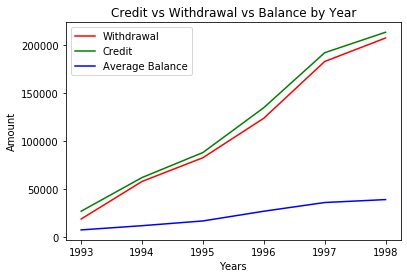

In [126]:
# Graph showing the difference of credits and withdrawal by year
plt.xlabel("Years")
plt.ylabel("Amount")
plt.title("Credit vs Withdrawal vs Balance by Year")
plt.plot(years, grand_avg["sum_Withdrawal_1993":"sum_Withdrawal_1998"], color = 'red', label = 'Withdrawal')
plt.plot(years, grand_avg["sum_Credit_1993":"sum_Credit_1998"], color = 'green', label = 'Credit')
plt.plot(years, grand_avg["mean_balance_1993":"mean_balance_1998"], color = 'blue', label = 'Average Balance')
plt.legend()

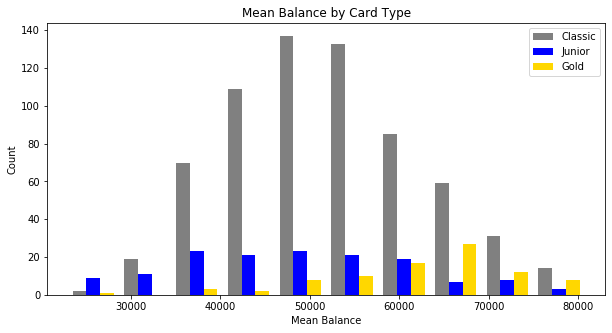

In [86]:
# Participation by card type in each one of the percentiles
# More gold card holders have higher mean balance on their accounts

plt.figure(figsize = (10, 5))
plt.ylabel('Count')
plt.xlabel('Mean Balance')
plt.title('Mean Balance by Card Type')
plt.hist([db3['mean_Balance'][db3['card_type'] == 'classic'], db3['mean_Balance'][db3['card_type'] == 'junior'],db3['mean_Balance'][db3['card_type'] == 'gold']], bins = 10, rwidth = 0.8, color = ['grey','blue', 'gold'],
        label = ['Classic','Junior', 'Gold'])

plt.legend()


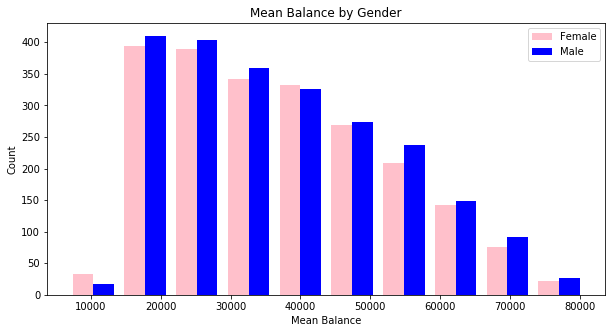

In [87]:
# More female account holders maintain the lowest mean balance.

plt.figure(figsize = (10, 5))
plt.ylabel('Count')
plt.xlabel('Mean Balance')
plt.title('Mean Balance by Gender')
plt.hist([db3['mean_Balance'][db3['gender'] == 'F'], db3['mean_Balance'][db3['gender'] == 'M']], bins = 10, rwidth = 0.8, color = ['pink','blue'],
        label = ['Female','Male'])

plt.legend()

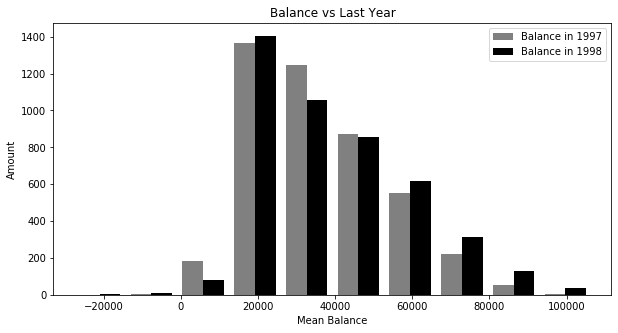

In [88]:
# Balance 1998 vs Balance 1997 by percentil
plt.figure(figsize = (10, 5))
plt.ylabel('Amount')
plt.xlabel('Mean Balance')
plt.title('Balance vs Last Year')
plt.hist([db3['mean_balance_1997'], db3['mean_balance_1998']], bins = 10, rwidth = 0.8, color = ['gray','black'],
        label = ['Balance in 1997','Balance in 1998'])

plt.legend()

In [89]:
db3.groupby(['card_type'])['mean_Balance'].agg('median').reset_index()

,card_type,mean_Balance
0,classic,51551.228904
1,gold,63990.362520
2,junior,48080.790871


In [90]:
# Bank has not classified any of the Gold Card holders' loans as irrecoverable. 
#   
db3.groupby(['card_type','loan_status'])['mean_Balance'].agg('mean').reset_index()

,card_type,loan_status,mean_Balance
0,classic,Client in debt. Contract running,50375.842969
1,classic,Loan repaid. Contract closed,55116.568679
2,classic,Loan unpaid. Contract closed,46978.820171
3,classic,No loan,51302.128331
4,classic,OK so far. Contract running,55552.040045
5,gold,Client in debt. Contract running,56211.763974
6,gold,Loan repaid. Contract closed,64549.325910
7,gold,No loan,61805.996625
8,gold,OK so far. Contract running,67353.983846
9,junior,Loan repaid. Contract closed,63607.714675


In [91]:
db3.groupby(['gender','loan_status'])['mean_balance_1998'].agg('count').reset_index()

,gender,loan_status,mean_balance_1998
0,F,Client in debt. Contract running,24
1,F,Loan repaid. Contract closed,103
2,F,Loan unpaid. Contract closed,17
3,F,No loan,1860
4,F,OK so far. Contract running,204
5,M,Client in debt. Contract running,21
6,M,Loan repaid. Contract closed,100
7,M,Loan unpaid. Contract closed,14
8,M,No loan,1958
9,M,OK so far. Contract running,199


In [92]:
db3.groupby(['loan_duration','loan_status'])['mean_balance_1998'].agg('count').reset_index()

,loan_duration,loan_status,mean_balance_1998
0,12.0,Client in debt. Contract running,1
1,12.0,Loan repaid. Contract closed,93
2,12.0,Loan unpaid. Contract closed,10
3,12.0,OK so far. Contract running,27
4,24.0,Client in debt. Contract running,6
5,24.0,Loan repaid. Contract closed,64
6,24.0,Loan unpaid. Contract closed,11
7,24.0,OK so far. Contract running,57
8,36.0,Client in debt. Contract running,8
9,36.0,Loan repaid. Contract closed,32


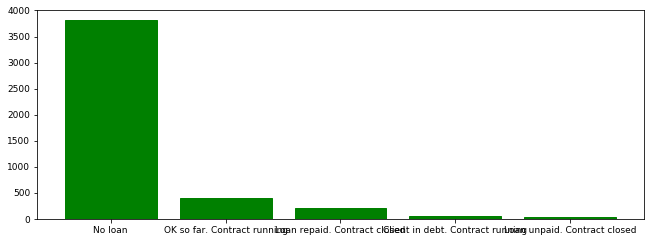

In [93]:
# Using subplots or facets along with Bar Plots
fig = plt.figure(figsize = (25, 4))
fig.subplots_adjust(top=0.85, wspace=0.3)

ax2 = fig.add_subplot(1,2, 2)
ww_q = db3['loan_status'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.tick_params(axis='both', which='major', labelsize=9)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='green', 
               edgecolor='green', linewidth=1)

In [94]:
db3.groupby("loan_status")["client_id"].agg("count")

loan_status
Client in debt. Contract running      45
Loan repaid. Contract closed         203
Loan unpaid. Contract closed          31
No loan                             3818
OK so far. Contract running          403
Name: client_id, dtype: int64

In [95]:
x = db3[db3["loan_status"]!="No loan"]["A3"]

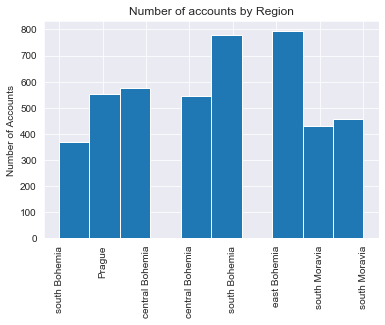

In [159]:
plt.hist(db3["A3"], orientation="vertical")
plt.xticks(x, db3["A3"], rotation="vertical")
plt.title("Number of accounts by Region")
plt.ylabel("Number of Accounts")
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

go.Histogram(
    histfunc = "count",
    y = y,
    x = x,
    name = "count"
  )

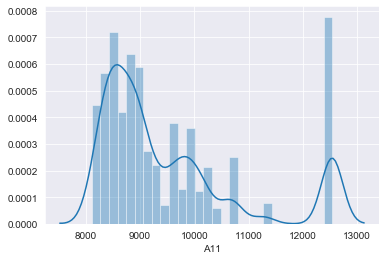

In [136]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(db3["A11"], norm_hist="bool")

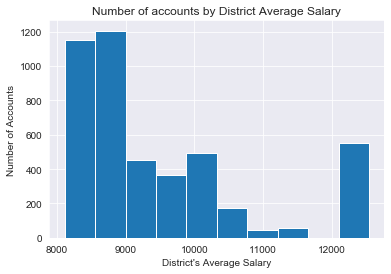

In [138]:
plt.hist(db3["A11"], orientation="vertical")
plt.title("Number of accounts by District Average Salary")
plt.xlabel("District's Average Salary")
plt.ylabel("Number of Accounts")
plt.show()

In [99]:
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(db3["loan_amount"], db3["loan_duration"], size=10, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p)

In [100]:
xlabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [127]:
p = figure(x_range=xlabels, plot_height=250, title="Monthly Deposits")
p.line(x=xlabels, y=avg_m_deposits)
show(p)

In [102]:
p = figure(x_range=xlabels, plot_height=250, title="Monthly Withdrawals")
p.vbar(x=xlabels, top=avg_m_withdrawals, width=0.9)
show(p)

In [103]:
db3["loan_status"].value_counts()

No loan                             3818
OK so far. Contract running          403
Loan repaid. Contract closed         203
Client in debt. Contract running      45
Loan unpaid. Contract closed          31
Name: loan_status, dtype: int64

In [139]:
p = figure(x_axis_label='Age', y_axis_label='Total Credits')
p.circle(db3["age"], db3["sum_Credit"])
p.x(db3["age"], db3["sum_Withdrawal"])
show(p)

#shows that people in the older age group are doing less transactions (credits as well as withdrawals than middle aged groups)
#CHECK IF BOXPLOT IS POSSIBLE


In [140]:
db3.groupby("age_group")["sum_Withdrawal"].agg(["median", "min"])

,median,min
age_group,,
10,336278.2,11100.0
20,469861.8,9700.0
30,594032.0,1400.0
40,611760.8,8500.0
50,584946.6,1400.0
60,272767.0,18400.0
70,186190.2,30588.8
80,159333.2,41008.2


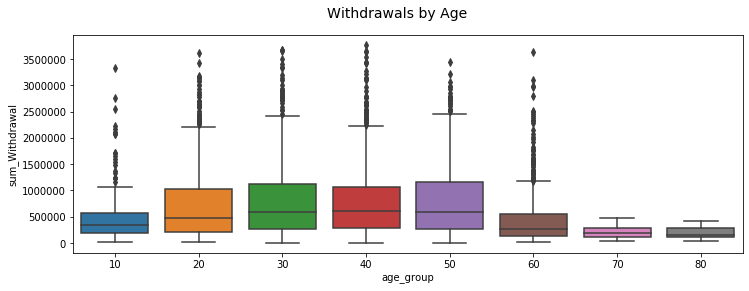

In [105]:
# Box Plots
f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Withdrawals by Age', fontsize=14)

sns.boxplot(x="age_group", y="sum_Withdrawal", data=db3,  ax=ax2)

In [141]:
db3.groupby("age_group")["sum_Credit"].agg(["median", "min"])

,median,min
age_group,,
10,395285.7,42444.1
20,524833.9,19700.0
30,648778.6,21700.0
40,656902.3,22400.0
50,625538.6,26035.1
60,305754.3,39800.0
70,215775.1,53663.2
80,187827.3,63192.4


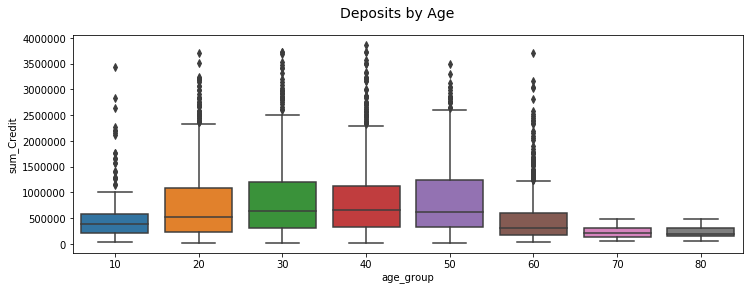

In [106]:
f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Deposits by Age', fontsize=14)

sns.boxplot(x="age_group", y="sum_Credit", data=db3,  ax=ax2)

In [144]:
db3.groupby("age_group")["mean_Balance"].agg(["median", "min"])

,median,min
age_group,,
10,34319.839610,14042.811765
20,37875.651682,11908.333333
30,39569.616253,10470.116223
40,38998.413110,6629.616848
50,40009.060689,7590.814658
60,26132.231829,7301.796427
70,22228.056349,7275.211879
80,21791.429164,13684.605357


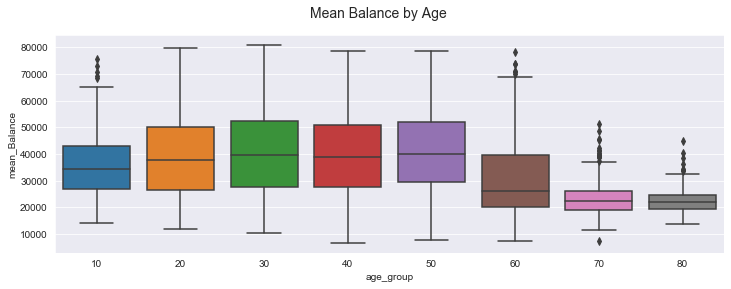

In [143]:
f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Mean Balance by Age', fontsize=14)

sns.boxplot(x="age_group", y="mean_Balance", data=db3,  ax=ax2)

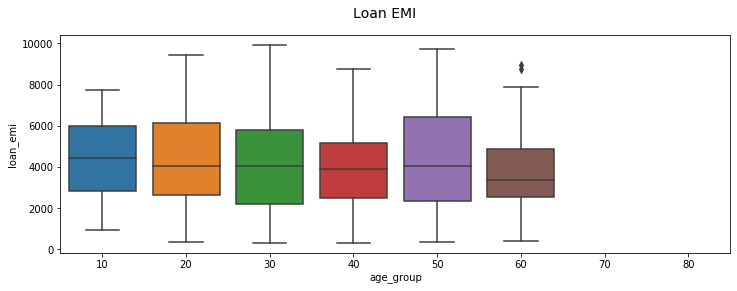

In [107]:
f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan EMI', fontsize=14)

sns.boxplot(x="age_group", y="loan_emi", data=db3,  ax=ax2)

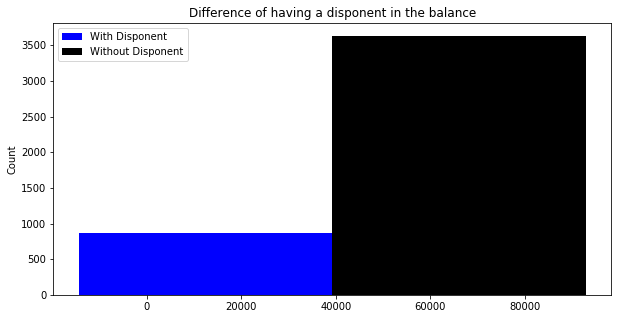

In [108]:
# Participation by 'Count_disponent'
plt.figure(figsize = (10, 5))
plt.ylabel('Count')
plt.title('Difference of having a disponent in the balance')
plt.hist([db3['mean_balance_1998'][db3['count_DISPONENT'] == 1], db3['mean_balance_1998'][db3['count_DISPONENT'] == 0]], bins = 1, rwidth = 0.8, color = ['blue','black'],
        label = ['With Disponent','Without Disponent'])

plt.legend()

In [109]:
db3.groupby("loan_status")["mean_Balance"].agg(["median", "min"])

,median,min
loan_status,,
Client in debt. Contract running,35294.761728,8250.471630
Loan repaid. Contract closed,49907.234923,17351.428739
Loan unpaid. Contract closed,38378.961504,10812.467385
No loan,33214.127259,6629.616848
OK so far. Contract running,47343.955673,13645.077273


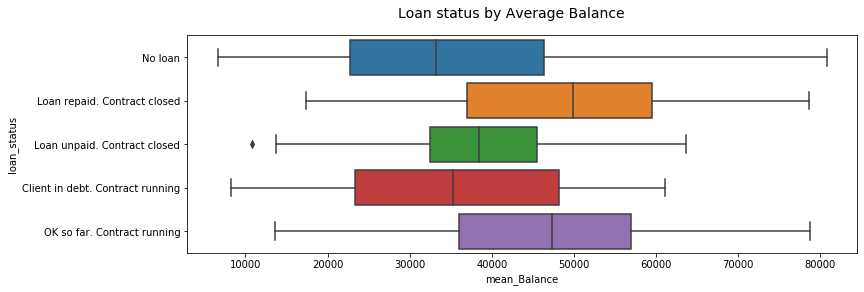

In [110]:
# accounts with higher average Balance perform better on loans - Lower bound of fully repaid loans.
# NPAs are to clients with low average Balance 

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan status by Average Balance', fontsize=14)

sns.boxplot(x="mean_Balance", y="loan_status", data=db3,  ax=ax2)

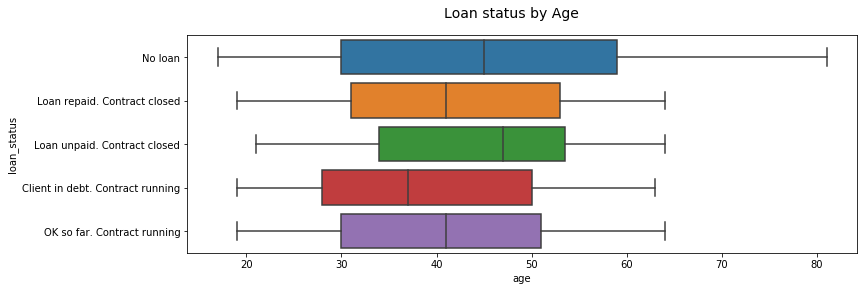

In [111]:
# Non performing loans are mostly in the middle aged clients category. 
# However, looking at defaults, it seems like the bank waits for many years till classifying the NPAs as non-recoverable

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan status by Age', fontsize=14)

sns.boxplot(x="age", y="loan_status", data=db3,  ax=ax2)

In [112]:
db3.groupby("loan_status")["A11"].agg(["median", "min", "max"])

,median,min,max
loan_status,,,
Client in debt. Contract running,8746,8110,12541
Loan repaid. Contract closed,9060,8110,12541
Loan unpaid. Contract closed,8991,8110,12541
No loan,8991,8110,12541
OK so far. Contract running,8968,8110,12541


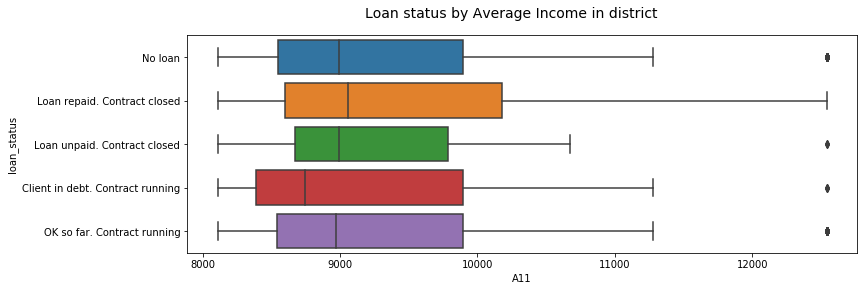

In [113]:
#Most of the clients who are having trouble paying back come from the lower income districts

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan status by Average Income in district', fontsize=14)

sns.boxplot(x="A11", y="loan_status", data=db3,  ax=ax2)

In [114]:
db3.groupby("loan_status")["loan_emi"].agg(["median", "min"])

,median,min
loan_status,,
Client in debt. Contract running,5120.0,1728.0
Loan repaid. Contract closed,3874.0,319.0
Loan unpaid. Contract closed,5746.0,1671.0
No loan,NaN,NaN
OK so far. Contract running,3698.0,304.0


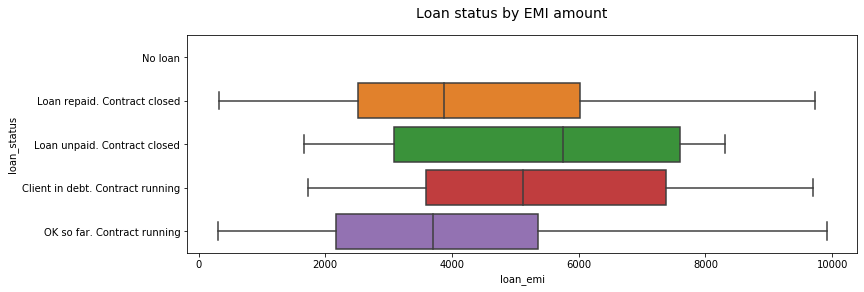

In [115]:
# High EMI loans have higher incidence of loan repayment performance

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan status by EMI amount', fontsize=14)

sns.boxplot(x="loan_emi", y="loan_status", data=db3,  ax=ax2)

In [116]:
db3.groupby("A3")["loan_emi"].agg(["median", "min"])

,median,min
A3,,
Prague,4050.5,429.0
central Bohemia,4178.0,527.0
east Bohemia,3427.0,319.0
north Bohemia,3640.0,304.0
north Moravia,4329.0,371.0
south Bohemia,4017.0,638.0
south Moravia,3805.0,359.0
west Bohemia,3584.0,312.0


In [117]:
db3.groupby(["A3","loan_status"])["A3"].agg("count")

A3               loan_status                     
Prague           Client in debt. Contract running      4
                 Loan repaid. Contract closed         34
                 Loan unpaid. Contract closed          3
                 No loan                             470
                 OK so far. Contract running          43
central Bohemia  Client in debt. Contract running      5
                 Loan repaid. Contract closed         26
                 Loan unpaid. Contract closed          5
                 No loan                             484
                 OK so far. Contract running          54
east Bohemia     Client in debt. Contract running      9
                 Loan repaid. Contract closed         19
                 No loan                             460
                 OK so far. Contract running          56
north Bohemia    Loan repaid. Contract closed         19
                 Loan unpaid. Contract closed          1
                 No loan              

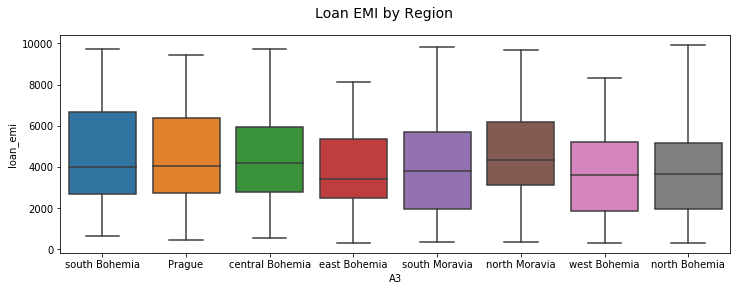

In [118]:
# Clients from East Bohemia take low EMI loans which have performed better for the bank   

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Loan EMI by Region', fontsize=14)

sns.boxplot(x="A3", y="loan_emi", data=db3,  ax=ax2)

In [119]:
db3.groupby("A3")["mean_Balance"].agg(["median", "min"])

,median,min
A3,,
Prague,36981.108779,8389.564437
central Bohemia,35208.169565,7590.814658
east Bohemia,34428.789101,9889.054642
north Bohemia,34811.114263,10618.546984
north Moravia,35125.175234,6629.616848
south Bohemia,35585.400188,13147.021742
south Moravia,35124.523976,12142.532468
west Bohemia,34750.237720,7301.796427


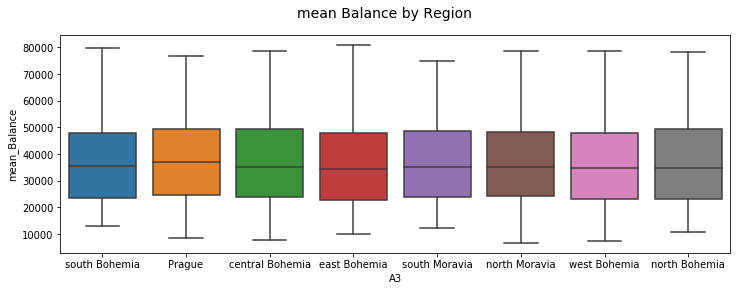

In [120]:
# There are no large differences in the average Balance maintained by the clients from different regions

f, (ax2) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('mean Balance by Region', fontsize=14)

sns.boxplot(x="A3", y="mean_Balance", data=db3,  ax=ax2)

In [129]:
# Ratio of Urban inhabitants not linked to mean balance maintained by clients from those regions

p = figure(x_axis_label='Urban Inhabitants', y_axis_label='Mean Balance')
p.circle(db3["A10"], db3["mean_Balance"])
show(p)

In [122]:
# Ratio of Urban inhabitants not linked to mean balance maintained by clients from those regions

p = figure(x_axis_label='Urban Inhabitants', y_axis_label='Mean Withdrawal')
p.circle(db3["A10"], db3["mean_Withdrawal"])
show(p)

In [130]:
# Ratio of Urban inhabitants not linked to mean balance maintained by clients from those regions

p = figure(x_axis_label='Urban Inhabitants', y_axis_label='Mean Credit')
p.circle(db3["A10"], db3["mean_Credit"])
show(p)

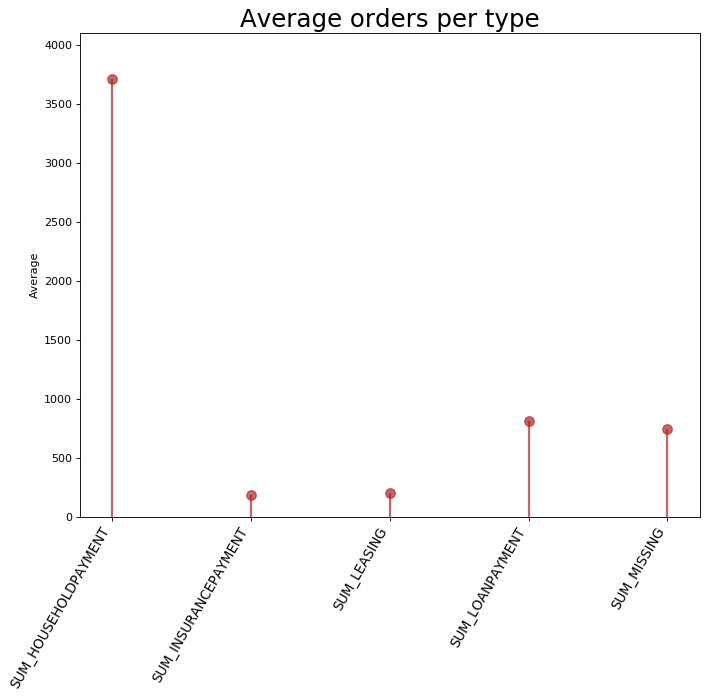

In [124]:
#Llolipop chart for type of order 
# Draw plot
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)
ax.vlines(x=grand_avg['sum_HouseholdPayment':'sum_Missing'].index, ymin=0, ymax=grand_avg['sum_HouseholdPayment':'sum_Missing'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=grand_avg['sum_HouseholdPayment':'sum_Missing'].index, y=grand_avg['sum_HouseholdPayment':'sum_Missing'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Average orders per type', fontdict={'size':22})
ax.set_ylabel('Average')
ax.set_xticks(grand_avg['sum_HouseholdPayment':'sum_Missing'].index)
ax.set_xticklabels(grand_avg['sum_HouseholdPayment':'sum_Missing'].index.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 4100)

plt.show()

# 3) Segmentation

***Cleaning data:***

In [161]:
# Selecting features for segmentation modeling
dbc = ['age', 'gender','sum_Credit_1993', 'sum_Credit_1994', 'sum_Credit_1995', 'sum_Credit_1996', 'sum_Credit_1997', 'sum_Credit_1998', 'sum_Withdrawal_1993', 'sum_Withdrawal_1994', 'sum_Withdrawal_1995', 'sum_Withdrawal_1996', 'sum_Withdrawal_1997', 'sum_Withdrawal_1998', 'sum_Credit', 'sum_Withdrawal','mean_Credit', 'mean_Withdrawal', 'Household', 'Insurancepayment', 'Interestcredited', 'Loanpayment', 'trans_k_symbol_missing', 'Oldagepension', 'Paymentforstatement', 'Sanctioninterest', 'AB', 'CD', 'EF', 'GH', 'IJ', 'KL', 'MN', 'OP', 'Otherbank', 'QR', 'ST', 'UV', 'WX', 'YZ', 'count_HouseholdPayment', 'count_InsurancePayment', 'count_Leasing', 'count_LoanPayment', 'count_Missing', 'sum_HouseholdPayment', 'sum_InsurancePayment', 'sum_Leasing', 'sum_LoanPayment', 'sum_Missing', 'loan_amount', 'loan_duration', 'count_DISPONENT','card_type','A3','mean_Balance']

In [162]:
db_clustering = db2[dbc]

In [163]:
db_clustering = pd.DataFrame(db_clustering)

In [164]:
db_clustering['card_type'] = pd.Categorical(db_clustering['card_type'])
db_clustering_card_type = pd.get_dummies(db_clustering['card_type'],prefix=['card_type'])

In [165]:
# Transforming gender features
db_clustering['gender'] = pd.Categorical(db_clustering['gender'])
db_clustering_gender = pd.get_dummies(db_clustering['gender'],prefix=['gender'])

In [166]:
# Transforming A3 feature
db_clustering['A3'] = pd.Categorical(db_clustering['A3'])
db_clustering_region = pd.get_dummies(db_clustering['A3'],prefix=['A3'])

In [167]:
db_clustering = db_clustering.drop(columns=['card_type','gender','A3'])

In [168]:
db_clustering_final = pd.concat([db_clustering, db_clustering_card_type, db_clustering_gender,db_clustering_region], axis=1)

In [169]:
db_clustering_final = db_clustering_final.fillna(0)

In [170]:
db_clustering_final2 = db_clustering_final

In [171]:
pd.DataFrame(db_clustering_final2).head()

,age,sum_Credit_1993,sum_Credit_1994,sum_Credit_1995,sum_Credit_1996,sum_Credit_1997,sum_Credit_1998,sum_Withdrawal_1993,sum_Withdrawal_1994,sum_Withdrawal_1995,...,['gender']_F,['gender']_M,['A3']_Prague,['A3']_central Bohemia,['A3']_east Bohemia,['A3']_north Bohemia,['A3']_north Moravia,['A3']_south Bohemia,['A3']_south Moravia,['A3']_west Bohemia
0,29,0.0,0.0,49564.1,50066.0,49275.1,45415.3,0.0,0.0,31391.0,...,1,0,0,0,0,0,0,1,0,0
1,54,228685.3,264653.2,265361.8,288542.9,281578.0,268232.3,200844.6,259580.6,258853.6,...,0,1,1,0,0,0,0,0,0,0
3,43,0.0,0.0,0.0,0.0,58139.7,114919.3,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
5,80,0.0,0.0,0.0,56920.5,67644.8,67780.7,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
6,70,0.0,0.0,0.0,0.0,35950.9,61534.1,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [172]:
db_clustering_final = db_clustering_final.values

In [173]:
# Eliminating indexes in order to get a propper format for the modeling
db_clustering_final3 = db_clustering_final2.reset_index()

In [174]:
db_clustering_final3.head()

,index,age,sum_Credit_1993,sum_Credit_1994,sum_Credit_1995,sum_Credit_1996,sum_Credit_1997,sum_Credit_1998,sum_Withdrawal_1993,sum_Withdrawal_1994,...,['gender']_F,['gender']_M,['A3']_Prague,['A3']_central Bohemia,['A3']_east Bohemia,['A3']_north Bohemia,['A3']_north Moravia,['A3']_south Bohemia,['A3']_south Moravia,['A3']_west Bohemia
0,0,29,0.0,0.0,49564.1,50066.0,49275.1,45415.3,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
1,1,54,228685.3,264653.2,265361.8,288542.9,281578.0,268232.3,200844.6,259580.6,...,0,1,1,0,0,0,0,0,0,0
2,3,43,0.0,0.0,0.0,0.0,58139.7,114919.3,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
3,5,80,0.0,0.0,0.0,56920.5,67644.8,67780.7,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
4,6,70,0.0,0.0,0.0,0.0,35950.9,61534.1,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


***Segmentation by...***

In [175]:
# Feature selection per model
cluster_demographic = db_clustering_final2.loc[:,['gender', 'age' , 'A3']]
cluster_behaviour = db_clustering_final2.loc[:,['sum_Credit_1993', 'sum_Credit_1994', 'sum_Credit_1995', 'sum_Credit_1996', 'sum_Credit_1997', 'sum_Credit_1998', 'sum_Withdrawal_1993', 'sum_Withdrawal_1994', 'sum_Withdrawal_1995', 'sum_Withdrawal_1996', 'sum_Withdrawal_1997', 'sum_Withdrawal_1998', 'mean_Credit_1993', 'mean_Credit_1994', 'mean_Credit_1995', 'mean_Credit_1996', 'mean_Credit_1997', 'mean_Credit_1998', 'mean_Withdrawal_1993', 'mean_Withdrawal_1994', 'mean_Withdrawal_1995', 'mean_Withdrawal_1996', 'mean_Withdrawal_1997', 'mean_Withdrawal_1998','sum_Credit', 'sum_Withdrawal', 'mean_Credit', 'mean_Withdrawal','mean_Balance']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [176]:
# Eliminating NAs
cluster_demographic = cluster_demographic.fillna(0)
cluster_behaviour = cluster_behaviour.fillna(0)

In [177]:
# Transforming into values in order to model the database
cluster_demographic = cluster_demographic.values

In [178]:
cluster_behaviour = cluster_behaviour.values

***a) every feature:***

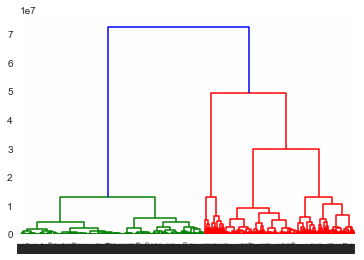

In [181]:
# Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(db_clustering_final3, method='ward'))

In [184]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [185]:
hc.fit(db_clustering_final)
labels = hc.labels_

In [186]:
# Saving clusters for chart
y_hc = hc.fit_predict(db_clustering_final)

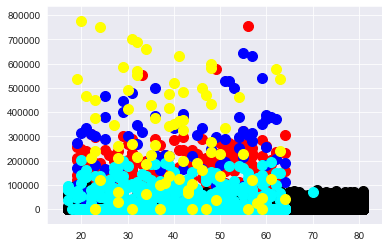

In [187]:
plt.scatter(db_clustering_final[y_hc ==0,0], db_clustering_final[y_hc == 0,1], s=100, c='red')
plt.scatter(db_clustering_final[y_hc==1,0], db_clustering_final[y_hc == 1,1], s=100, c='black')
plt.scatter(db_clustering_final[y_hc ==2,0], db_clustering_final[y_hc == 2,1], s=100, c='blue')
plt.scatter(db_clustering_final[y_hc ==3,0], db_clustering_final[y_hc == 3,1], s=100, c='cyan')
plt.scatter(db_clustering_final[y_hc ==4,0], db_clustering_final[y_hc == 4,1], s=100, c='yellow')
plt.scatter(db_clustering_final[y_hc ==5,0], db_clustering_final[y_hc == 5,1], s=100, c='magenta')
plt.scatter(db_clustering_final[y_hc ==6,0], db_clustering_final[y_hc == 6,1], s=100, c='maroon')
plt.scatter(db_clustering_final[y_hc ==7,0], db_clustering_final[y_hc == 7,1], s=100, c='olive')
plt.scatter(db_clustering_final[y_hc ==8,0], db_clustering_final[y_hc == 8,1], s=100, c='green')
plt.scatter(db_clustering_final[y_hc ==9,0], db_clustering_final[y_hc == 9,1], s=100, c='purple')
plt.scatter(db_clustering_final[y_hc ==10,0], db_clustering_final[y_hc == 10,1], s=100, c='teal')
plt.scatter(db_clustering_final[y_hc ==11,0], db_clustering_final[y_hc == 11,1], s=100, c='khaki')
plt.scatter(db_clustering_final[y_hc ==12,0], db_clustering_final[y_hc == 12,1], s=100, c='turquoise')

plt.show()

In [188]:
labels_cluster = pd.DataFrame(labels)

In [189]:
labels_cluster.columns = ['num Cluster']

In [190]:
labels_cluster.head()

,num Cluster
0,1
1,0
2,1
3,1
4,1


In [191]:
db_cluster = pd.concat([db_clustering_final3,labels_cluster], axis = 1)

In [192]:
db_cluster.groupby("num Cluster")[['sum_Credit_1993', 'sum_Credit_1994', 'sum_Credit_1995', 'sum_Credit_1996', 'sum_Credit_1997', 'sum_Credit_1998', 'sum_Withdrawal_1993', 'sum_Withdrawal_1994', 'sum_Withdrawal_1995', 'sum_Withdrawal_1996', 'sum_Withdrawal_1997', 'sum_Withdrawal_1998', 'sum_Credit', 'sum_Withdrawal','mean_Credit', 'mean_Withdrawal', 'Household', 'Insurancepayment', 'Interestcredited', 'Loanpayment']].agg('mean')

,sum_Credit_1993,sum_Credit_1994,sum_Credit_1995,sum_Credit_1996,sum_Credit_1997,sum_Credit_1998,sum_Withdrawal_1993,sum_Withdrawal_1994,sum_Withdrawal_1995,sum_Withdrawal_1996,sum_Withdrawal_1997,sum_Withdrawal_1998,sum_Credit,sum_Withdrawal,mean_Credit,mean_Withdrawal,Household,Insurancepayment,Interestcredited,Loanpayment
num Cluster,,,,,,,,,,,,,,,,,,,,
0,54147.689870,126593.138701,178605.217403,292817.813506,399428.247792,390709.162078,38246.597792,119204.542857,169699.092338,278243.954416,394286.792727,383592.298961,1.442301e+06,1.383273e+06,57297.733177,47070.984982,31.806494,6.016883,51.874026,6.857143
1,5435.268394,12976.497749,19535.508581,36652.237298,77580.147536,99990.650637,2002.723704,10719.111088,16469.182116,28676.219244,65560.301529,95748.039210,2.521703e+05,2.191756e+05,28445.985947,26864.071486,23.189890,2.111300,33.166950,0.523789
2,126563.470588,311340.974866,473816.149198,442349.812299,476505.400535,501975.864171,100150.141711,299481.598396,465127.209091,440735.762032,472955.981818,488981.382888,2.332552e+06,2.267432e+06,63799.008060,50566.371966,27.320856,6.080214,65.636364,11.786096
3,16915.024436,42955.196393,71954.001172,148751.133814,215992.108566,257865.746889,10050.262128,38975.777728,64133.536519,131603.370063,208852.214608,250199.369252,7.544332e+05,7.038145e+05,44645.042668,38749.064339,28.041479,6.489630,42.566276,3.743012
4,294097.041250,558173.585000,551925.416250,591718.417500,573339.378750,561220.448750,247852.277500,550098.681250,551544.788750,587038.746250,570587.870000,551893.768750,3.130474e+06,3.059016e+06,72736.072173,57498.372197,34.725000,7.037500,70.200000,8.900000


In [193]:
db_cluster.groupby("num Cluster")[["['card_type']_classic", "['card_type']_gold", "['card_type']_junior"]].agg('mean')

,['card_type']_classic,['card_type']_gold,['card_type']_junior
num Cluster,,,
0,0.274026,0.048052,0.040260
1,0.071368,0.004673,0.023364
2,0.251337,0.032086,0.069519
3,0.189360,0.023445,0.035167
4,0.287500,0.100000,0.087500


In [194]:
db_cluster.groupby("num Cluster")[["['card_type']_classic", "['card_type']_gold", "['card_type']_junior"]].agg('mean')

,['card_type']_classic,['card_type']_gold,['card_type']_junior
num Cluster,,,
0,0.274026,0.048052,0.040260
1,0.071368,0.004673,0.023364
2,0.251337,0.032086,0.069519
3,0.189360,0.023445,0.035167
4,0.287500,0.100000,0.087500


***b) demographic:***

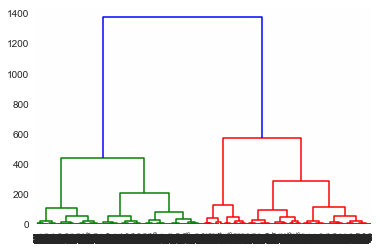

In [195]:
# Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(cluster_demographic, method='ward'))

In [196]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [197]:
hc.fit(cluster_demographic)
labels = hc.labels_

In [198]:
# Saving clusters for chart
y_hc = hc.fit_predict(cluster_demographic)

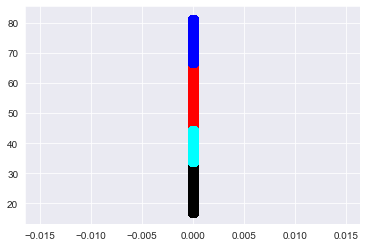

In [199]:
plt.scatter(cluster_demographic[y_hc ==0,0], cluster_demographic[y_hc == 0,1], s=100, c='red')
plt.scatter(cluster_demographic[y_hc==1,0], cluster_demographic[y_hc == 1,1], s=100, c='black')
plt.scatter(cluster_demographic[y_hc ==2,0], cluster_demographic[y_hc == 2,1], s=100, c='blue')
plt.scatter(cluster_demographic[y_hc ==3,0], cluster_demographic[y_hc == 3,1], s=100, c='cyan')
plt.scatter(cluster_demographic[y_hc ==4,0], cluster_demographic[y_hc == 4,1], s=100, c='yellow')

plt.show()

***c) behaviour:***

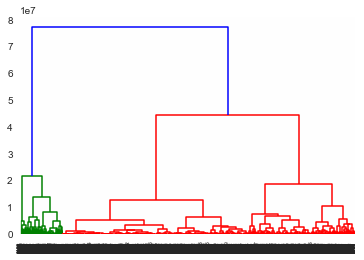

In [200]:
# Creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(cluster_behaviour, method='ward'))

In [201]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage = 'ward')

In [202]:
hc.fit(cluster_behaviour)
labels_behaviour = hc.labels_

In [203]:
# Saving clusters for chart
y_hc = hc.fit_predict(cluster_behaviour)

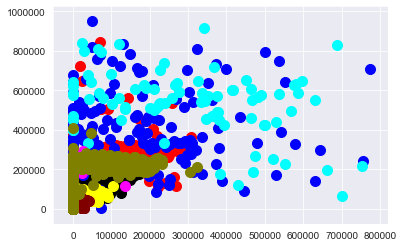

In [204]:
plt.scatter(cluster_behaviour[y_hc ==0,0], cluster_behaviour[y_hc == 0,1], s=100, c='red')
plt.scatter(cluster_behaviour[y_hc==1,0], cluster_behaviour[y_hc == 1,1], s=100, c='black')
plt.scatter(cluster_behaviour[y_hc ==2,0], cluster_behaviour[y_hc == 2,1], s=100, c='blue')
plt.scatter(cluster_behaviour[y_hc ==3,0], cluster_behaviour[y_hc == 3,1], s=100, c='cyan')
plt.scatter(cluster_behaviour[y_hc ==4,0], cluster_behaviour[y_hc == 4,1], s=100, c='yellow')
plt.scatter(cluster_behaviour[y_hc ==5,0], cluster_behaviour[y_hc == 5,1], s=100, c='magenta')
plt.scatter(cluster_behaviour[y_hc ==6,0], cluster_behaviour[y_hc == 6,1], s=100, c='maroon')
plt.scatter(cluster_behaviour[y_hc ==7,0], cluster_behaviour[y_hc == 7,1], s=100, c='olive')
plt.scatter(cluster_behaviour[y_hc ==8,0], cluster_behaviour[y_hc == 8,1], s=100, c='green')

plt.show()

In [205]:
labels_behaviour = pd.DataFrame(labels_behaviour)

In [206]:
labels_behaviour.columns = ['num Cluster']

In [207]:
labels_behaviour.head()

,num Cluster
0,6
1,0
2,6
3,6
4,6


In [208]:
db_behaviour = pd.concat([db_clustering_final3,labels_behaviour], axis = 1)

In [209]:
db_behaviour.groupby("num Cluster")[["sum_Credit",'age',"sum_Withdrawal"]].agg('median')

,sum_Credit,age,sum_Withdrawal
num Cluster,,,
0,1668748.75,42,1612534.4
1,742642.30,41,691999.4
2,2267224.80,40,2197683.9
3,3052860.10,40,2983608.4
4,410546.90,48,368721.1
5,1219491.40,41,1151070.4
6,166591.85,49,136575.0
7,1225190.70,40,1163291.8


***Created by:*** SHARMA, Rishabh; AHUILE, Abdon and POLANCO, Jorge.